In [ ]:
#Завантажуємо файл Most Streamed Spotify Songs 2023
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("spotify-2023.csv", encoding="cp1251")

print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

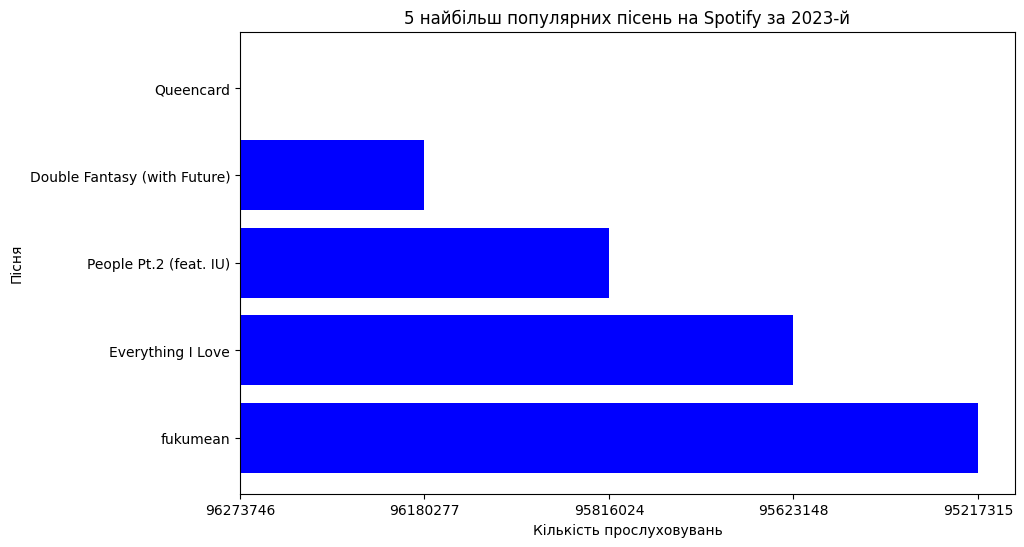

In [ ]:
#Фільтрація даних для виділення пісень 2023-го
songs_2023 = data[data["released_year"] == 2023]

top_songs = songs_2023.sort_values(by ="streams", ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.barh(top_songs["track_name"], top_songs["streams"], color="b")
plt.xlabel("Кількість прослуховувань")
plt.ylabel("Пісня")
plt.title("5 найбільш популярних пісень на Spotify за 2023-й")
plt.gca().invert_yaxis()
plt.show()

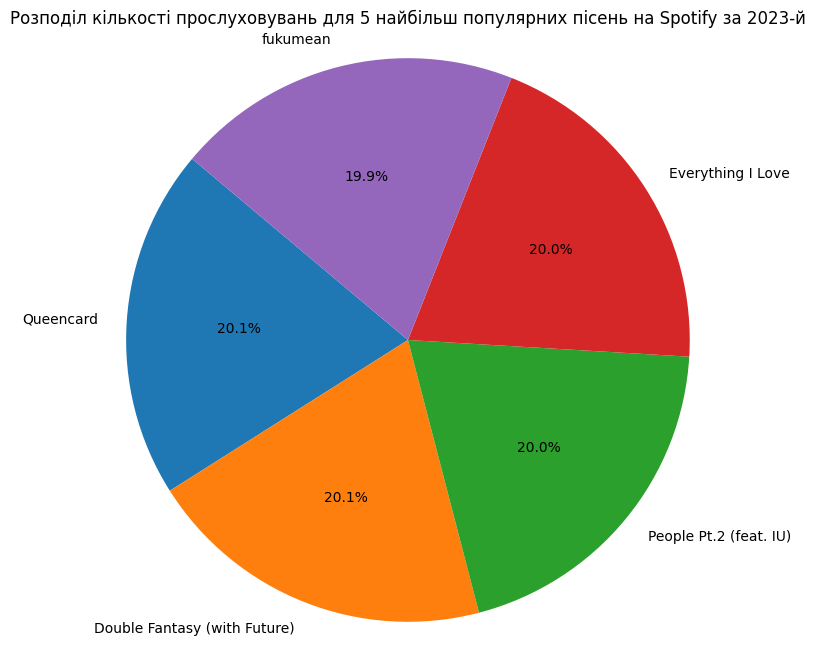

In [ ]:
#Кругова діаграма з 5 найбільш популярними піснями
import matplotlib.pyplot as plt

songs_2023 = data[data["released_year"] == 2023]

top_songs = songs_2023.sort_values(by ="streams", ascending=False).head(5)

plt.figure(figsize=(8,8))
plt.pie(top_songs["streams"], labels=top_songs["track_name"], autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Розподіл кількості прослуховувань для 5 найбільш популярних пісень на Spotify за 2023-й")
plt.show()

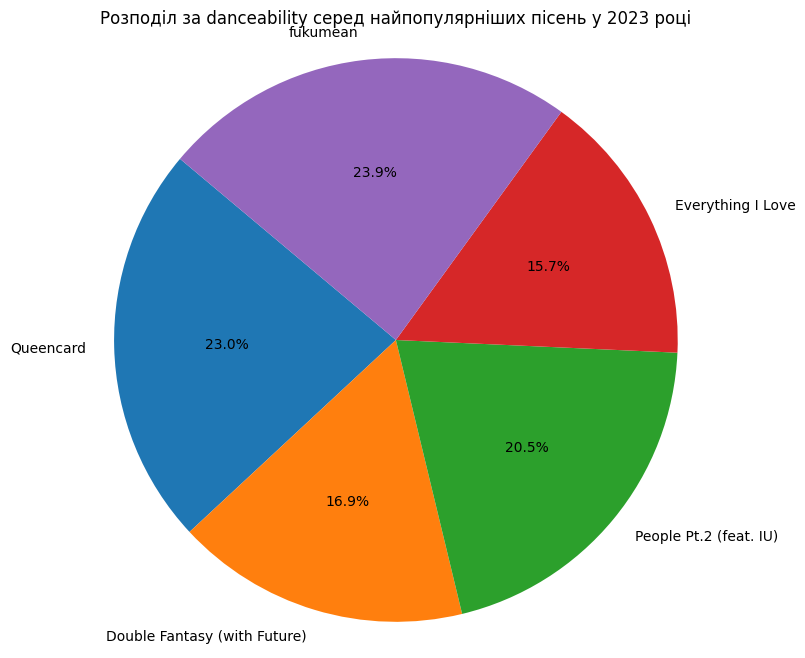

In [ ]:
#розподіл за danceability серед найпопулярніших пісень у 2023 році.
total_danceability = top_songs["danceability_%"].astype(float).sum()
top_songs["danceability_percentage"] = top_songs["danceability_%"].astype(float) / total_danceability * 100

# Створення кругової діаграми
plt.figure(figsize=(8,8))
plt.pie(top_songs["danceability_percentage"], labels=top_songs["track_name"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Розподіл за danceability серед найпопулярніших пісень у 2023 році")
plt.show()

                            track_name    artist(s)_name    streams  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook  141381703   

   released_year  released_month  
0           2023               7  


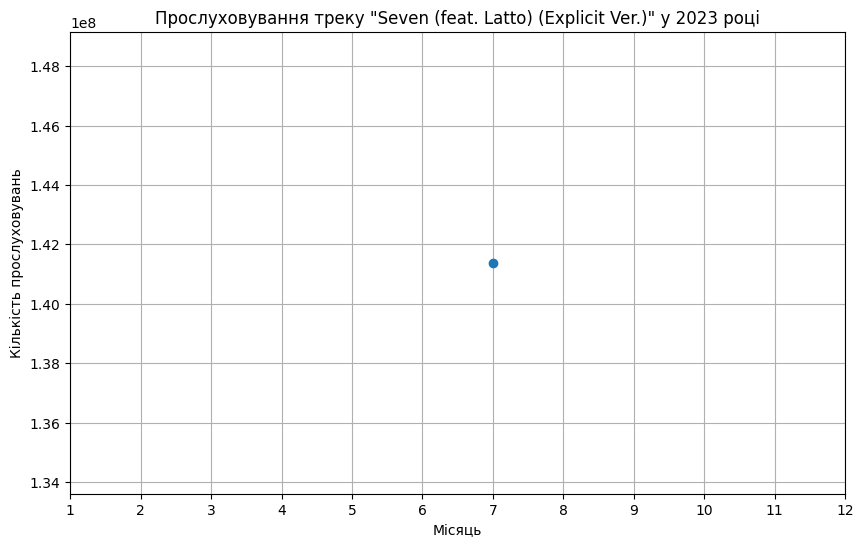

In [ ]:
#зміни кількості прослуховувань  треку 'Seven (feat. Latto) (Explicit Ver.) протягом року 2023 року
track_data = df[(df['track_name'] == 'Seven (feat. Latto) (Explicit Ver.)') & (df['released_year'] == 2023)]

# Перевірка даних
print(track_data)

# Якщо дані є, групуємо їх за місяцями та будуємо графік
if not track_data.empty:
    # Групування даних за місяцями
    monthly_data = track_data.groupby('released_month')['streams'].sum()

    # Побудова лінійного графіка
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_data.index, monthly_data.values, marker='o', linestyle='-')
    plt.title('Прослуховування треку "Seven (feat. Latto) (Explicit Ver.)" у 2023 році')
    plt.xlabel('Місяць')
    plt.ylabel('Кількість прослуховувань')
    plt.grid(True)
    plt.xticks(range(1, 13))
    plt.show()
else:
    print("Дані для цього треку за 2023 рік відсутні.")

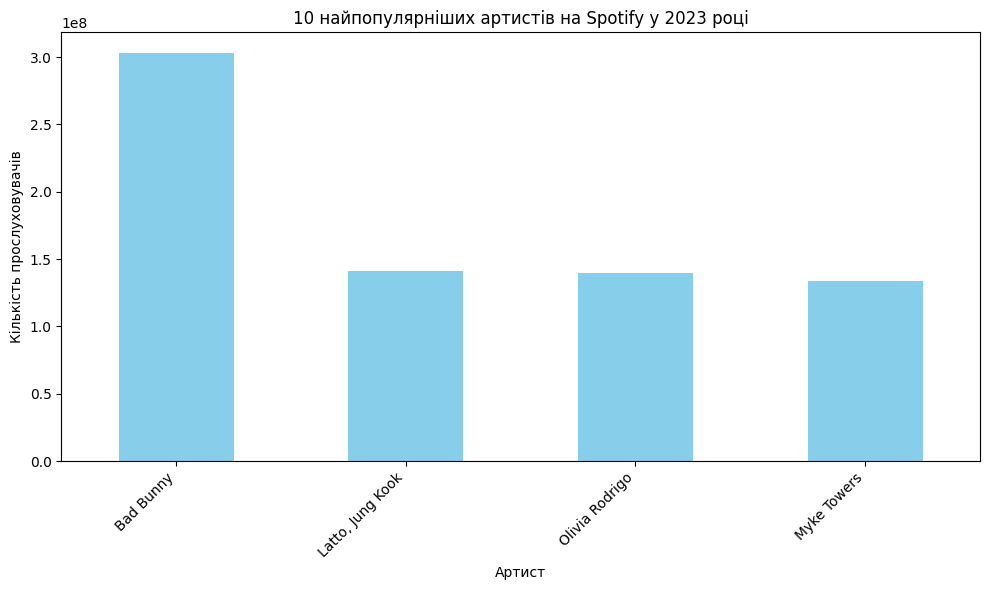

In [ ]:
#відображення 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.


data_2023 = df[df['released_year'] == 2023]

# Групування та підрахунок кількості слухачів для кожного артиста
artist_popularity = data_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False)

# Вибір 10 найпопулярніших артистів
top_10_artists = artist_popularity.head(10)

# Побудова стовпчикової діаграми
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')
plt.title('10 найпопулярніших артистів на Spotify у 2023 році')
plt.xlabel('Артист')
plt.ylabel('Кількість прослуховувачів')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

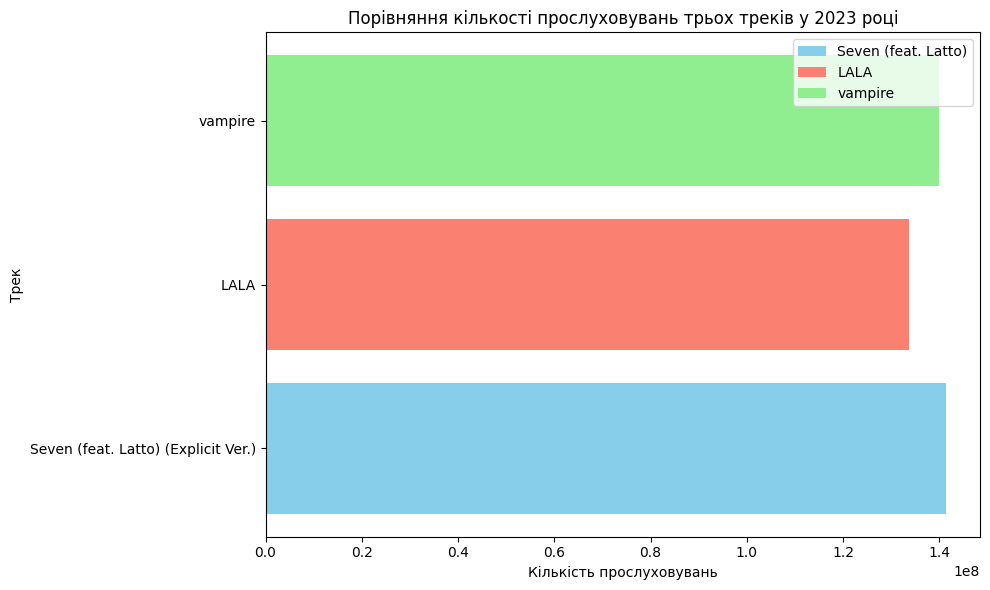

In [ ]:
#порівняння кількість прослуховувань трьох конкретних треків у 2023 році.

data_2023 = df[df['released_year'] == 2023]

# Вибір трьох конкретних треків
track1 = data_2023[data_2023['track_name'] == 'Seven (feat. Latto) (Explicit Ver.)']
track2 = data_2023[data_2023['track_name'] == 'LALA']
track3 = data_2023[data_2023['track_name'] == 'vampire']

# Побудова горизонтальної стовпчикової діаграми
plt.figure(figsize=(10, 6))
plt.barh(track1['track_name'], track1['streams'], color='skyblue', label='Seven (feat. Latto)')
plt.barh(track2['track_name'], track2['streams'], color='salmon', label='LALA')
plt.barh(track3['track_name'], track3['streams'], color='lightgreen', label='vampire')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Трек')
plt.title('Порівняння кількості прослуховувань трьох треків у 2023 році')
plt.legend()
plt.tight_layout()
plt.show()